In [33]:
import pandas as pd

In [34]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_ids = test["PassengerId"]

In [35]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [36]:
def clean(data):
    data = data.drop(["Name", "PassengerId", "Cabin"], axis=1)

    cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Age"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
    
    cols2 = ['HomePlanet','Destination','CryoSleep','VIP']
    for  col in cols2:
        data[col].fillna(data[col].mode()[0], inplace=True)

    return data

data = clean(data)
test = clean(test)


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(2)
memory usage: 568.9+ KB


In [38]:
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [39]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

columns = ["HomePlanet", "CryoSleep", "Destination"]
for col in columns:
    data[col] = le.fit_transform(data[col])
    test[col] = le.transform(test[col])
    print(le.classes_)
      
data.head(5)

['Earth' 'Europa' 'Mars']
[False  True]
['55 Cancri e' 'PSO J318.5-22' 'TRAPPIST-1e']


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0,0,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,1,0,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,1,0,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0,0,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [41]:
y = data['Transported']
X = data.drop('Transported', axis=1)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)

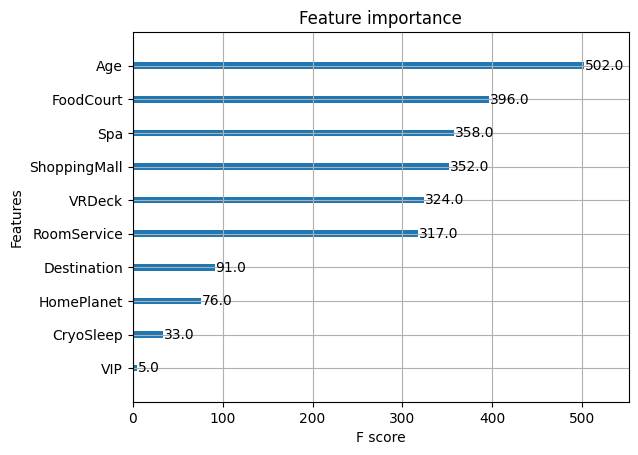

In [43]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
plot_importance(xgb_model)
pyplot.show()

In [44]:
predictions = xgb_model.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val,predictions)

0.7826336975273146

In [ ]:
submission_preds = xgb_model.predict(test)
df = pd.DataFrame({'PassengerId': test_ids.values,
                   'Survived': submission_preds})
df.to_csv('submission.csv',index=False)